/home/dodo/miniconda3/envs/qibendeepl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dodo/miniconda3/envs/qibendeepl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30149 (\N{CJK UNIFIED IDEOGRAPH-75C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dodo/miniconda3/envs/qibendeepl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dodo/miniconda3/envs/qibendeepl/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/dodo/miniconda3/envs/qibendeepl/lib/python3.11/site-packages/IPython/core/pylabtools.py:15

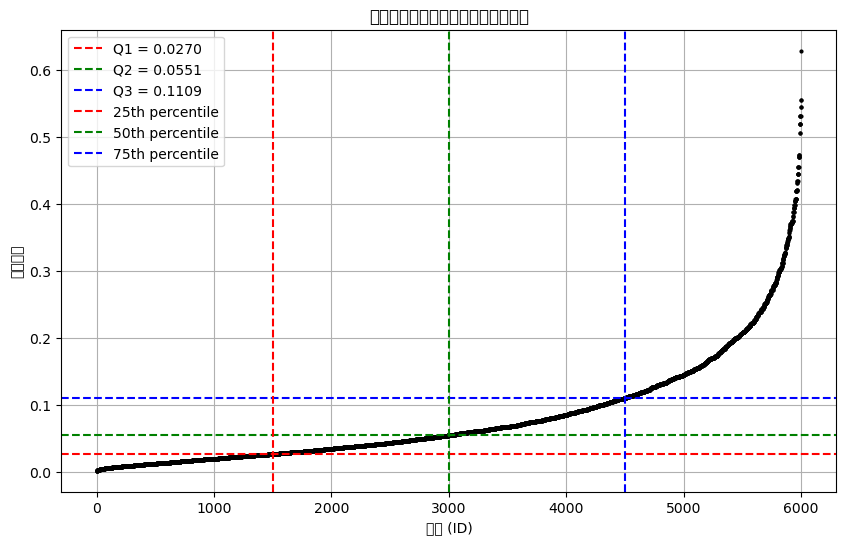

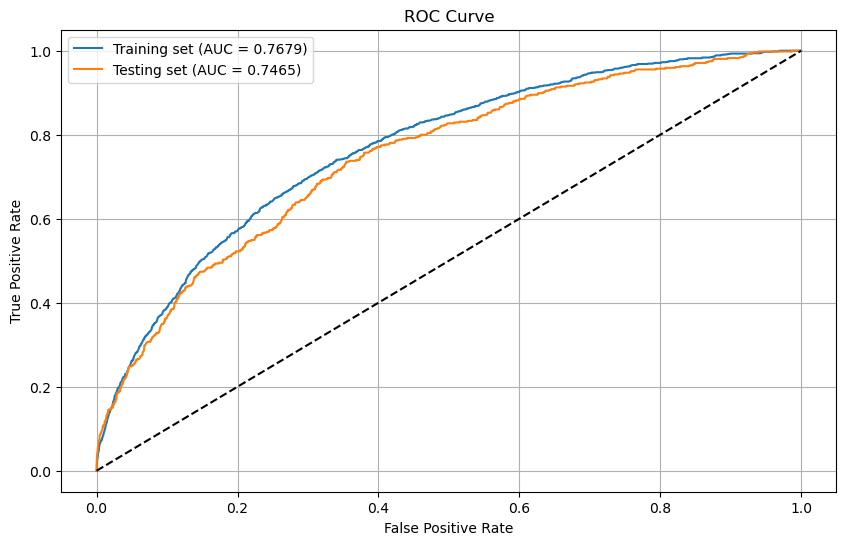

随机生成的个体特征: {'性别': '女', '年龄': '男≤55岁，女≤60岁', '胆固醇': '异常', '肾小球滤过率': '≥60', '糖尿病': '无', '贫血': '无', '锻炼情况': '较多', '高血压治疗情况': '有', '高血压控制情况': '好', '抑郁': '有', '睡眠呼吸暂停': '无'}
预测的发病概率: 0.0033
该个体的发病概率处于 0-25% 区间


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

# 定义相对危险度（RR）、暴露比例（P）和基准发病率
risk_factors = {
    '性别': {'男': {'RR': 1.34, 'P': 0.459, 'baseline_rate': 0.8641}, '女': {'RR': 1.00, 'P': 0.541, 'baseline_rate': 0.8641}},
    '年龄': {'男≤55岁，女≤60岁': {'RR': 0.41, 'P': 0.566, 'baseline_rate': 1.5015}, '男＞55岁，女＞60岁': {'RR': 1.00, 'P': 0.434, 'baseline_rate': 1.5015}},
    '胆固醇': {'正常': {'RR': 0.64, 'P': 0.866, 'baseline_rate': 1.4532}, '异常': {'RR': 1.00, 'P': 0.134, 'baseline_rate': 1.4532}},
    '肾小球滤过率': {'＜60': {'RR': 2.00, 'P': 0.10, 'baseline_rate': 0.9092}, '≥60': {'RR': 1.00, 'P': 0.90, 'baseline_rate': 0.9092}},
    '糖尿病': {'有': {'RR': 1.75, 'P': 0.137, 'baseline_rate': 0.9071}, '无': {'RR': 1.00, 'P': 0.863, 'baseline_rate': 0.9071}},
    '贫血': {'有': {'RR': 1.95, 'P': 0.069, 'baseline_rate': 0.9388}, '无': {'RR': 1.00, 'P': 0.931, 'baseline_rate': 0.9388}},
    '锻炼情况': {'较少': {'RR': 1.38, 'P': 0.125, 'baseline_rate': 0.9543}, '较多': {'RR': 1.00, 'P': 0.875, 'baseline_rate': 0.9543}},
    '高血压治疗情况': {'有': {'RR': 1.30, 'P': 0.3652, 'baseline_rate': 0.9009}, '无': {'RR': 1.00, 'P': 0.6348, 'baseline_rate': 0.9009}},
    '高血压控制情况': {'好': {'RR': 0.60, 'P': 0.9273, 'baseline_rate': 1.5862}, '差': {'RR': 1.00, 'P': 0.0727, 'baseline_rate': 1.5862}},
    '抑郁': {'有': {'RR': 1.57, 'P': 0.2326, 'baseline_rate': 0.8832}, '无': {'RR': 1.00, 'P': 0.7674, 'baseline_rate': 0.8832}},
    '睡眠呼吸暂停': {'有': {'RR': 1.79, 'P': 0.086, 'baseline_rate': 0.9363}, '无': {'RR': 1.00, 'P': 0.914, 'baseline_rate': 0.9363}}
}

# 生成模拟数据
np.random.seed(0)
num_individuals = 20000
data = []

for _ in range(num_individuals):
    choices = {
        '性别': np.random.choice(['男', '女']),
        '年龄': np.random.choice(['男≤55岁，女≤60岁', '男＞55岁，女＞60岁']),
        '胆固醇': np.random.choice(['正常', '异常']),
        '肾小球滤过率': np.random.choice(['＜60', '≥60']),
        '糖尿病': np.random.choice(['有', '无']),
        '贫血': np.random.choice(['有', '无']),
        '锻炼情况': np.random.choice(['较少', '较多']),
        '高血压治疗情况': np.random.choice(['有', '无']),
        '高血压控制情况': np.random.choice(['好', '差']),
        '抑郁': np.random.choice(['有', '无']),
        '睡眠呼吸暂停': np.random.choice(['有', '无'])
    }
    data.append(choices)

df = pd.DataFrame(data)

# 计算每个个体的发病概率
def calculate_individual_risk(row):
    baseline_rate = 1.0
    for factor, levels in risk_factors.items():
        level = row[factor]
        baseline_rate *= levels[level]['RR']
    return baseline_rate

df['发病概率'] = df.apply(calculate_individual_risk, axis=1)

# 将分类变量转换为数值变量
df = pd.get_dummies(df, drop_first=True)

# 生成目标变量（发病与否）
np.random.seed(0)
df['发病'] = np.random.binomial(1, df['发病概率'] / df['发病概率'].max(), size=num_individuals)

# 分割数据集
X = df.drop(columns=['发病', '发病概率'])
y = df['发病']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 标准化特征
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 训练逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测发病概率
y_pred_prob = model.predict_proba(X_test)[:, 1]

# 排序并绘制图表
sorted_indices = np.argsort(y_pred_prob)
sorted_probs = y_pred_prob[sorted_indices]
ids = range(1, len(sorted_probs) + 1)

# 计算四分位数
quantiles = np.percentile(sorted_probs, [25, 50, 75])
q1, q2, q3 = quantiles

plt.figure(figsize=(10, 6))
plt.plot(ids, sorted_probs, 'ko', markersize=2)

# 添加水平分位数线
plt.axhline(y=q1, color='r', linestyle='--', label=f'Q1 = {q1:.4f}')
plt.axhline(y=q2, color='g', linestyle='--', label=f'Q2 = {q2:.4f}')
plt.axhline(y=q3, color='b', linestyle='--', label=f'Q3 = {q3:.4f}')

# 添加竖直分位数线
plt.axvline(x=len(sorted_probs) * 0.25, color='r', linestyle='--', label=f'25th percentile')
plt.axvline(x=len(sorted_probs) * 0.50, color='g', linestyle='--', label=f'50th percentile')
plt.axvline(x=len(sorted_probs) * 0.75, color='b', linestyle='--', label=f'75th percentile')

plt.title('逻辑回归预测模型的发病概率曲线图')
plt.xlabel('序号 (ID)')
plt.ylabel('发病概率')
plt.legend()
plt.grid(True)
plt.show()

# 预测发病概率
y_pred_prob_train = model.predict_proba(X_train)[:, 1]
y_pred_prob_test = model.predict_proba(X_test)[:, 1]
# 绘制ROC曲线
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test)
auc_train = roc_auc_score(y_train, y_pred_prob_train)
auc_test = roc_auc_score(y_test, y_pred_prob_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Training set (AUC = {auc_train:.4f})')
plt.plot(fpr_test, tpr_test, label=f'Testing set (AUC = {auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


# 随机生成一个个体并进行预测
# random_individual = {
#     '性别': np.random.choice(['男', '女']),
#     '年龄': np.random.choice(['男≤55岁，女≤60岁', '男＞55岁，女＞60岁']),
#     '胆固醇': np.random.choice(['正常', '异常']),
#     '肾小球滤过率': np.random.choice(['＜60', '≥60']),
#     '糖尿病': np.random.choice(['有', '无']),
#     '贫血': np.random.choice(['有', '无']),
#     '锻炼情况': np.random.choice(['较少', '较多']),
#     '高血压治疗情况': np.random.choice(['有', '无']),
#     '高血压控制情况': np.random.choice(['好', '差']),
#     '抑郁': np.random.choice(['有', '无']),
#     '睡眠呼吸暂停': np.random.choice(['有', '无'])
# }

# random_individual = {
#     '性别': '男',
#     '年龄': '男＞55岁，女＞60岁',
#     '胆固醇': '正常',
#     '肾小球滤过率': '＜60',
#     '糖尿病': '有',
#     '贫血': '无',
#     '锻炼情况': '较少',
#     '高血压治疗情况': '有',
#     '高血压控制情况': '差',
#     '抑郁': '无',
#     '睡眠呼吸暂停': '无'
# } #0.73

#下限 0.27 0.42

random_individual = {
    '性别': '女',
    '年龄': '男≤55岁，女≤60岁',
    '胆固醇': '异常',
    '肾小球滤过率': '≥60',
    '糖尿病': '无',
    '贫血': '无',
    '锻炼情况': '较多',
    '高血压治疗情况': '有',
    '高血压控制情况': '好',
    '抑郁': '有',
    '睡眠呼吸暂停': '无'
}

# random_individual = {
#     '性别': '男',
#     '年龄': '男≤55岁，女≤60岁',
#     '胆固醇': '异常',
#     '肾小球滤过率': '≥60',
#     '糖尿病': '无',
#     '贫血': '无',
#     '锻炼情况': '较多',
#     '高血压治疗情况': '有',
#     '高血压控制情况': '好',
#     '抑郁': '有',
#     '睡眠呼吸暂停': '有'
# }

# 将随机个体转换为DataFrame格式
random_individual_df = pd.DataFrame([random_individual])

# 将分类变量转换为数值变量
random_individual_df = pd.get_dummies(random_individual_df, drop_first=True)

# 对特征进行标准化
random_individual_df = random_individual_df.reindex(columns=X.columns, fill_value=0)
random_individual_scaled = scaler.transform(random_individual_df)

# 预测随机个体的发病概率
random_individual_prob = model.predict_proba(random_individual_scaled)[:, 1][0]

# 判断随机个体的发病概率处于哪个分位数区间
if random_individual_prob <= q1:
    quantile_range = '0-25%'
elif random_individual_prob <= q2:
    quantile_range = '25-50%'
elif random_individual_prob <= q3:
    quantile_range = '50-75%'
else:
    quantile_range = '75-100%'

print(f"随机生成的个体特征: {random_individual}")
print(f"预测的发病概率: {random_individual_prob:.4f}")
print(f"该个体的发病概率处于 {quantile_range} 区间")
